                        Message_Text Caller_Location Communication_Type  \
0         Free gift offer, click now           Delhi               Text   
1           Your package has shipped          Mumbai               Text   
2  Unknown number calling repeatedly         Unknown               Call   
3         Bank alert: verify account         Chennai               Text   
4                     Meeting at 6pm           Delhi               Text   

   Duration_Seconds  Is_Fraud  
0                 2         1  
1                 5         0  
2                42         1  
3                 3         1  
4                 8         0  
---Metrices---!
Accuarcy_Score 0.625
Recall_Score 1.0
Precision_Score 0.5714285714285714
F1_Score 0.7272727272727273


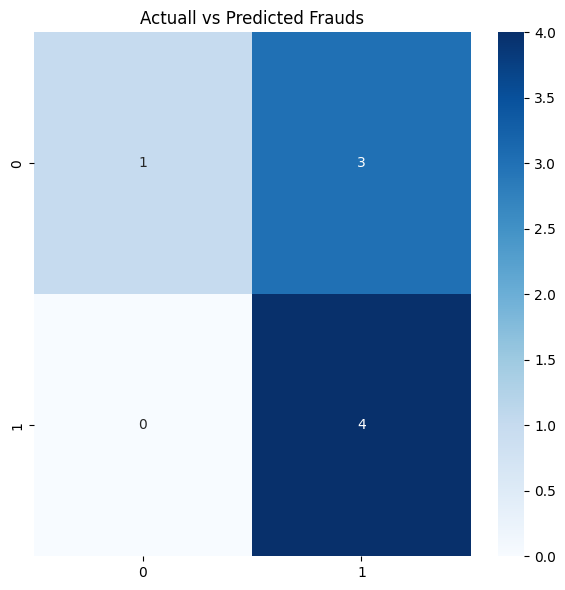

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

df=pd.read_csv("fraud1.csv")
print(df.head())

le=LabelEncoder()
le_type=LabelEncoder()

df["Caller_Location"]=le.fit_transform(df["Caller_Location"])
df["Communication_Type"]=le_type.fit_transform(df["Communication_Type"])

tfidf = TfidfVectorizer(max_features=10)
X_text = tfidf.fit_transform(df["Message_Text"]).toarray()

X_other = df[["Caller_Location", "Communication_Type", "Duration_Seconds"]].values
X = np.hstack((X_text, X_other))

y=df["Is_Fraud"]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=8)

scaler=StandardScaler()
x_train[:, -3:] = scaler.fit_transform(x_train[:, -3:])
x_test[:, -3:] = scaler.transform(x_test[:, -3:])

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("---Metrices---!")
print("Accuarcy_Score",accuracy_score(y_test,y_pred))
print("Recall_Score",recall_score(y_test,y_pred))
print("Precision_Score",precision_score(y_test,y_pred))
print("F1_Score",f1_score(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,6))
plt.xlabel("Actuall Fraud")
plt.ylabel("Predicted Fraud")
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Actuall vs Predicted Frauds")
plt.tight_layout()
plt.show()